In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
bresults = pd.read_csv("results.csv")

bresults_azul = bresults[bresults["Stock"] == "AZUL4.SA"]
bresults_prio = bresults[bresults["Stock"] == "PRIO3.SA"]
bresults_tsla = bresults[bresults["Stock"] == "TSLA"]
bresults_viva = bresults[bresults["Stock"] == "VIVA3.SA"]

In [ ]:
def plot_features(value1, value2):
    fig, axes = plt.subplots(2, 2)
    axes.flatten()

    xmin, xmax = np.min(bresults[value1]), np.max(bresults[value1])
    ymin, ymax = np.min(bresults[value2]), np.max(bresults[value2])

    axes[0, 0].plot(bresults_azul[value1], bresults_azul[value2])
    axes[0, 0].set_title("AZUL4.SA")
    axes[0, 0].set_xlim(xmin, xmax)
    axes[0, 0].set_ylim(ymin, ymax)

    axes[1, 0].plot(bresults_prio[value1], bresults_prio[value2])
    axes[1, 0].set_title("PRIO3.SA")
    axes[1, 0].set_xlim(xmin, xmax)
    axes[1, 0].set_ylim(ymin, ymax)

    axes[0, 1].plot(bresults_tsla[value1], bresults_tsla[value2])
    axes[0, 1].set_title("TSLA")
    axes[0, 1].set_xlim(xmin, xmax)
    axes[0, 1].set_ylim(ymin, ymax)

    axes[1, 1].plot(bresults_viva[value1], bresults_viva[value2])
    axes[1, 1].set_title("VIVA3.SA")
    axes[1, 1].set_xlim(xmin, xmax)
    axes[1, 1].set_ylim(ymin, ymax)

    plt.tight_layout()
    plt.show()

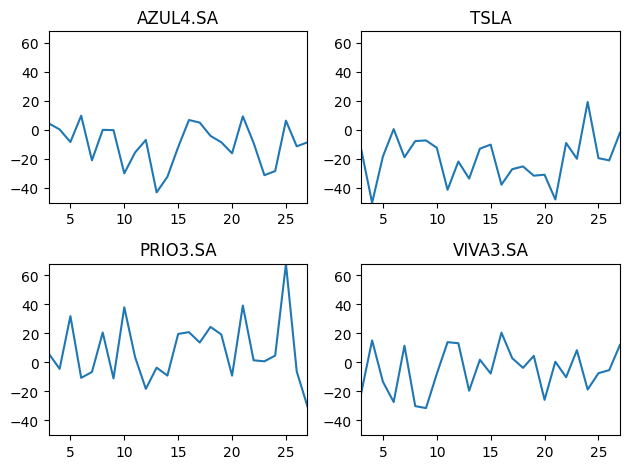

In [30]:
plot_features("Features", "Percent Return")

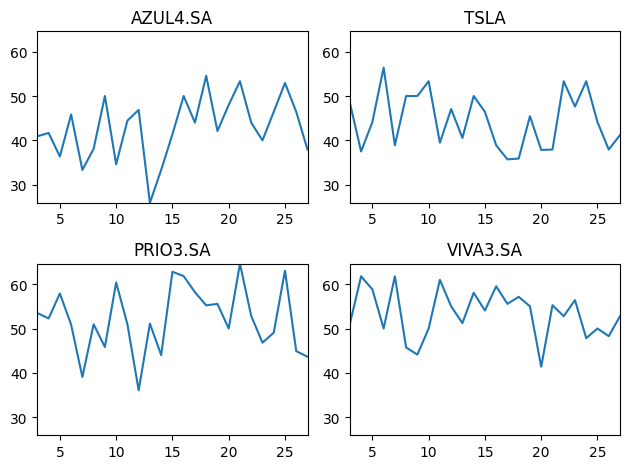

In [31]:
plot_features("Features", "Win Rate")

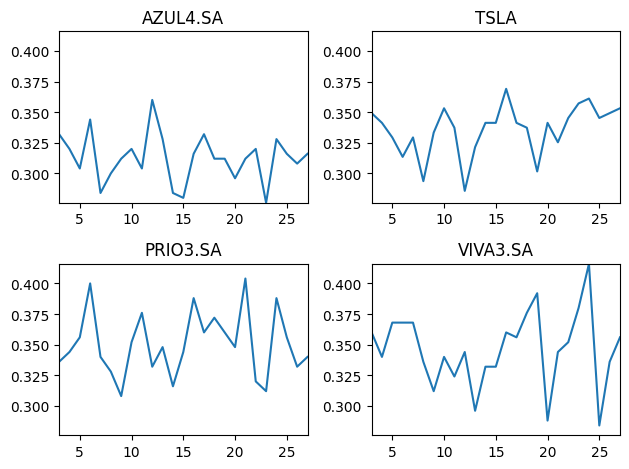

In [ ]:
plot_features("Features", "Accuracy Test")

In [ ]:
plot_features("Features", "Total Dict")

In [51]:
def r_squared(poly1d_fn, x, y):
    # Calculando o R²
    y_pred = poly1d_fn(x)  # Valores previstos pela regressão
    ss_res = np.sum((y - y_pred) ** 2)  # Soma dos quadrados dos resíduos
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Soma dos quadrados totais
    r_squared = 1 - (ss_res / ss_tot)  # Cálculo do R²

    return r_squared

def linear_regression(x, y):
    coef = np.polyfit(x, y, 1)  # Coeficientes da regressão linear
    poly1d_fn = np.poly1d(coef)

    return poly1d_fn

def scatter_features(value1, value2):
    fig, axes = plt.subplots(2, 2)
    axes.flatten()

    xmin, xmax = np.min(bresults[value1]), np.max(bresults[value1])
    ymin, ymax = np.min(bresults[value2]), np.max(bresults[value2])

    axes[0, 0].scatter(bresults_azul[value1], bresults_azul[value2])
    axes[0, 0].set_title("AZUL4.SA")
    axes[0, 0].set_xlim(xmin, xmax)
    axes[0, 0].set_ylim(ymin, ymax)
    poly1d_fn = linear_regression(bresults_azul[value1], bresults_azul[value2])
    axes[0, 0].plot(bresults[value1], poly1d_fn(bresults[value1]), color='red', label=round(r_squared(poly1d_fn, bresults_azul[value1], bresults_azul[value2]), 2))
    axes[0, 0].legend()

    axes[1, 0].scatter(bresults_prio[value1], bresults_prio[value2])
    axes[1, 0].set_title("PRIO3.SA")
    axes[1, 0].set_xlim(xmin, xmax)
    axes[1, 0].set_ylim(ymin, ymax)
    poly1d_fn = linear_regression(bresults_prio[value1], bresults_prio[value2])
    axes[1, 0].plot(bresults[value1], poly1d_fn(bresults[value1]), color='red', label=round(r_squared(poly1d_fn, bresults_prio[value1], bresults_prio[value2]), 2))
    axes[1, 0].legend()

    axes[0, 1].scatter(bresults_tsla[value1], bresults_tsla[value2])
    axes[0, 1].set_title("TSLA")
    axes[0, 1].set_xlim(xmin, xmax)
    axes[0, 1].set_ylim(ymin, ymax)
    poly1d_fn = linear_regression(bresults_tsla[value1], bresults_tsla[value2])
    axes[0, 1].plot(bresults[value1], poly1d_fn(bresults[value1]), color='red', label=round(r_squared(poly1d_fn, bresults_tsla[value1], bresults_tsla[value2]), 2))
    axes[0, 1].legend()

    axes[1, 1].scatter(bresults_viva[value1], bresults_viva[value2])
    axes[1, 1].set_title("VIVA3.SA")
    axes[1, 1].set_xlim(xmin, xmax)
    axes[1, 1].set_ylim(ymin, ymax)
    poly1d_fn = linear_regression(bresults_viva[value1], bresults_viva[value2])
    axes[1, 1].plot(bresults[value1], poly1d_fn(bresults[value1]), color='red', label=round(r_squared(poly1d_fn, bresults_viva[value1], bresults_viva[value2]), 2))
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

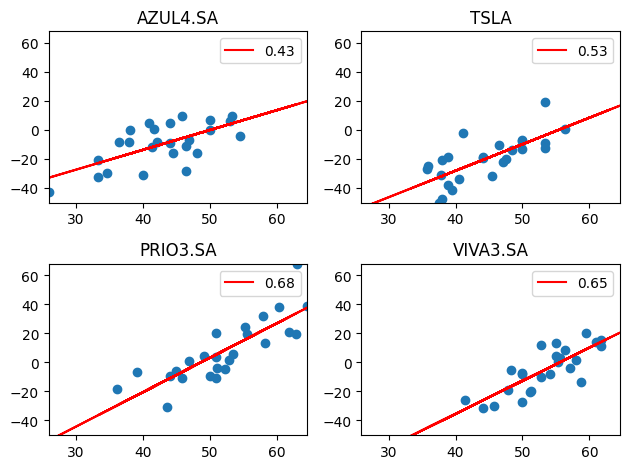

In [52]:
scatter_features("Win Rate", "Percent Return")

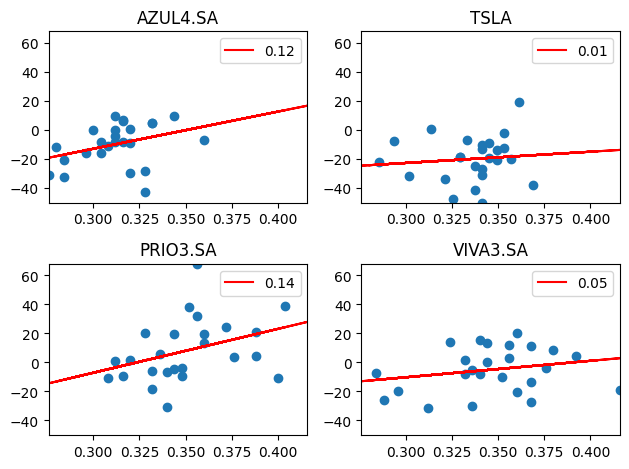

In [53]:
scatter_features("Accuracy Test", "Percent Return")

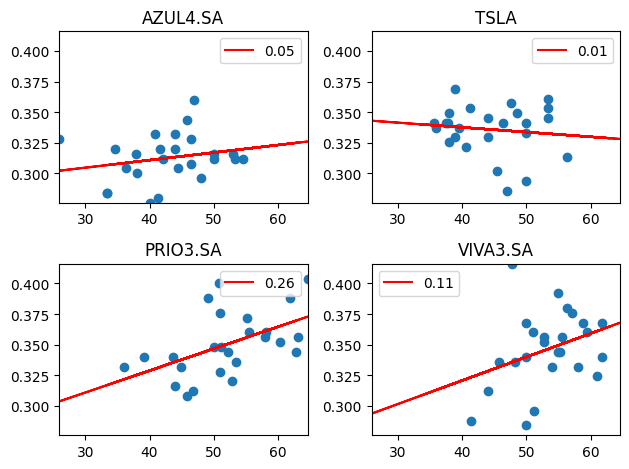

In [54]:
scatter_features("Win Rate", "Accuracy Test")